In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt


Importing the Data

In [30]:
df=pd.read_csv('CarsData.csv')
df.sample(10)

,Brand,Type,Manufacture_year,Mileage,Price,Body_type,Fuel,Horse_Power,Gear_box,Transmission,Color,Governorate,Address
1200,BMW,Série 1 F20,05-2012,170 000 km,55 000 DT,Compacte,Essence,7 ...,Automatique,Traction,Noir,Sfax,ADRESSE :Sfax
270,Mahindra,Scorpio SUV,12-2013,258 000 km,34 000 DT,Citadine,Diesel,8 ...,Manuelle,Traction,Blanc,Ben Arous,ADRESSE :TUNISIE AUTO PRIX EZZAHRA Sortie Auto...
1192,Audi,A6 X,07-2015,35 000 km,115 000 DT,Berline,Essence,5 ...,Automatique,Intégrale,Blanc,Tunis,"ADRESSE :Rue du lac Huron, lac 1"
2851,Volvo,S60 R Design Toutes options,08-2012,168 000 km,46 000 DT,Berline,Essence,7 ...,Automatique,Traction,Blanc,Tunis,ADRESSE :Les jardins de carthage
2243,KIA,Cerato,07-2013,300 000 km,38 000 DT,Citadine,Essence,7 ...,Manuelle,Traction,Noir,Ben Arous,ADRESSE :Ben Arous
2703,Mercedes-Benz,Classe E E220d,11-2019,90 000 km,215 000 DT,Berline,Essence,10 ...,Automatique,Intégrale,Noir,Ariana,ADRESSE :La Soukra
1030,Mercedes-Benz,Classe C KIT AMG / PACK NIGHT,03-2022,16 000 km,245 000 DT,Berline,Hybride (essence/électrique),10 ...,Automatique,Propulsion,Noir,Sousse,"ADRESSE :SOUSSE Boulevard 14 Janvier, en face ..."
3327,Mercedes-Benz,Classe E Blue Efficiency,12-2012,166 000 km,81 000 DT,Berline,Hybride (essence/électrique),11 ...,Automatique,Propulsion,Blanc,Sousse,ADRESSE :Sousse
1433,Chevrolet,Camaro RS COUPE,07-2014,40 146 km,160 000 DT,Coupé,Essence,21 ...,Automatique,Intégrale,Rouge,Sfax,"ADRESSE :sfax route sokra km 4,5"
15,Mercedes-Benz,Classe E,04-2011,175 000 km,55 000 DT,Berline,Diesel,9 ...,Automatique,Traction,Noir,Ben Arous,ADRESSE :TUNISIE AUTO PRIX EZZAHRA Sortie Auto...


Cleaning and setting up the Data

In [31]:
df['Price']=df['Price'].str.replace('DT','')
df['Price']=df['Price'].str.replace(' ','')
df=df.rename(columns={'Price':'Price(DT)'})

In [32]:
df['Governorate']=df['Governorate'].str.replace('La Manouba','Manouba')

In [33]:
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=df['Mileage'].str.replace(' ','')
df=df.rename(columns={'Mileage':'Mileage(Km)'})

In [34]:
df['Address']=df['Address'].str.replace('ADRESSE :','')

In [35]:
df['Horse_Power']=df['Horse_Power'].str.replace('cv','CV')

In [36]:
df['Manufacture_year']=pd.to_datetime (df['Manufacture_year'] , format='%m-%Y')

In [37]:
df['Mileage(Km)'] = df['Mileage(Km)'].astype(int)
df['Price(DT)'] = df['Price(DT)'].astype(int)


In [38]:
df.dtypes

Brand                       object
Type                        object
Manufacture_year    datetime64[ns]
Mileage(Km)                  int32
Price(DT)                    int32
Body_type                   object
Fuel                        object
Horse_Power                 object
Gear_box                    object
Transmission                object
Color                       object
Governorate                 object
Address                     object
dtype: object

In [39]:
df

,Brand,Type,Manufacture_year,Mileage(Km),Price(DT),Body_type,Fuel,Horse_Power,Gear_box,Transmission,Color,Governorate,Address
0,Volkswagen,Golf 7,2012-12-01,264500,42000,Compacte,Essence,5 ...,Manuelle,Traction,Blanc,Tunis,AIN ZAGHOUANE
1,Mercedes-Benz,Classe A,2021-01-01,50000,165000,Utilitaire,Hybride (essence/électrique),6 ...,Automatique,Traction,Noir,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
2,Land,Rover Range Rover Sport HSE TU 239,2014-05-01,90000,238000,SUV/4x4,Essence,24 ...,Automatique,Traction,Vert,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
3,Mercedes-Benz,Classe S KIT AMG jantes 20’’,2010-04-01,165000,125500,Berline,Essence,18 ...,Automatique,Traction,Noir,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
4,BMW,Série 5 LUXYRY LINE,2018-04-01,46000,183000,Berline,Essence,10 ...,Automatique,Traction,Blanc,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,KIA,Sportage SX 2022,2022-09-01,14000,162500,Monospace,Essence,10 ...,Automatique,Traction,Noir,Manouba,Manouba residence yassine cité les orangers
3500,Toyota,Aygo,2019-08-01,75000,30000,Compacte,Essence,4 ...,Manuelle,Traction,Rouge,Monastir,Skanes Monastir
3501,MG,ZS,2019-11-01,75000,70000,Autres,Essence,7 ...,Automatique,Intégrale,Noir,Tunis,LAC 1
3502,Fiat,500 2009,2009-08-01,175000,23000,Citadine,Essence,4 ...,Manuelle,Traction,Noir,Ben Arous,Rades


array([[<Axes: title={'center': 'Manufacture_year'}>,
        <Axes: title={'center': 'Mileage(Km)'}>],
       [<Axes: title={'center': 'Price(DT)'}>, <Axes: >]], dtype=object)

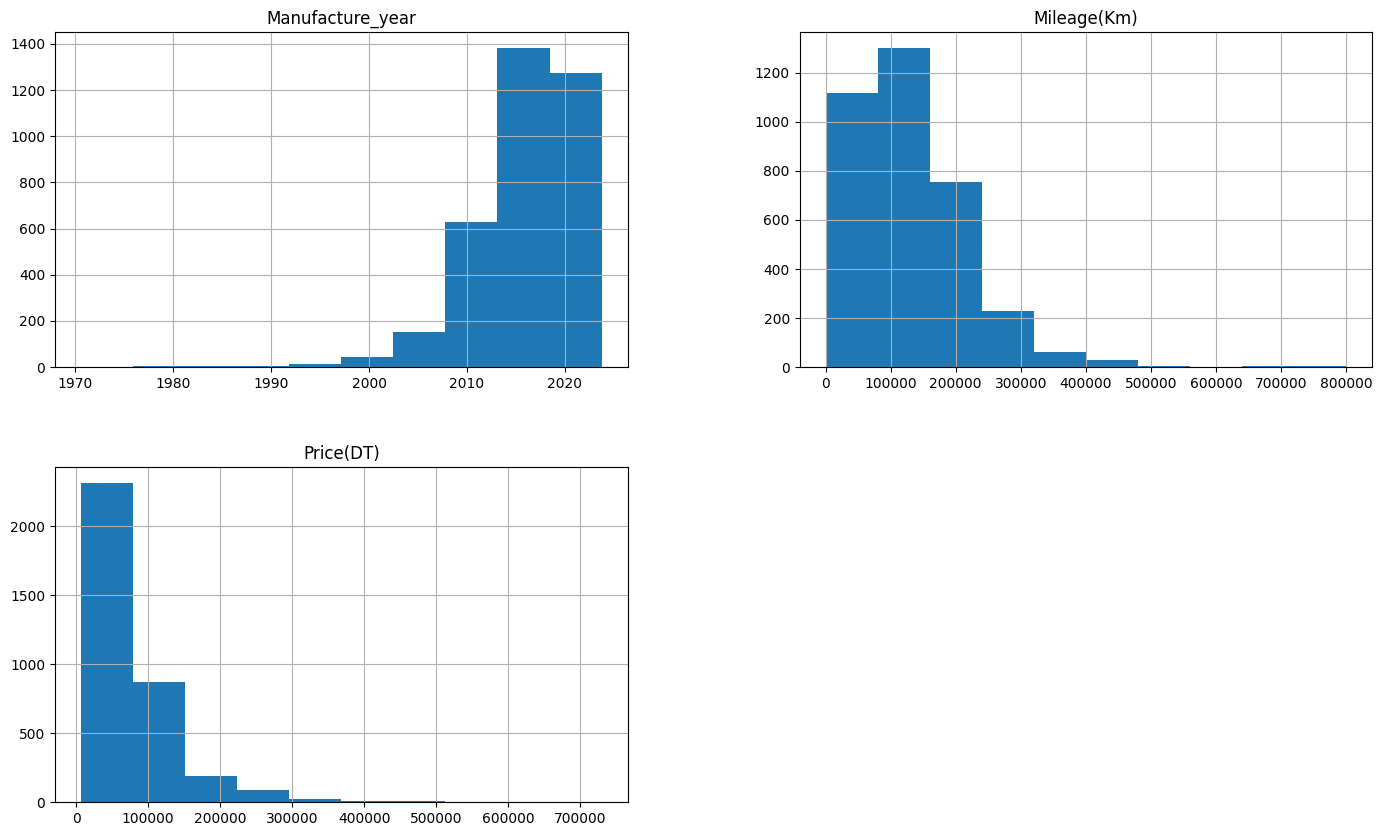

In [64]:
df.hist(figsize=(17,10))

Brand
Mercedes-Benz    433
Volkswagen       382
BMW              268
Peugeot          264
KIA              193
Citroën          186
Audi             151
Ford             149
Renault          126
Fiat             105
Seat             103
Hyundai           98
Nissan            97
Toyota            93
Mazda             82
Land              82
MG                67
Ssangyong         62
Porsche           58
Haval             55
Suzuki            52
Mini              34
Mahindra          34
Jeep              30
Chery             28
Chevrolet         26
Opel              25
Dacia             23
Honda             22
Jaguar            19
Skoda             18
Great             18
Alfa              13
Mitsubishi        11
Isuzu             11
Geely             10
Iveco             10
Volvo              9
DS                 9
Dongfeng           8
BAIC               6
Lada               5
DFSK               5
Cupra              5
Wallyscar          4
BYD                3
Faw                2
Infinit

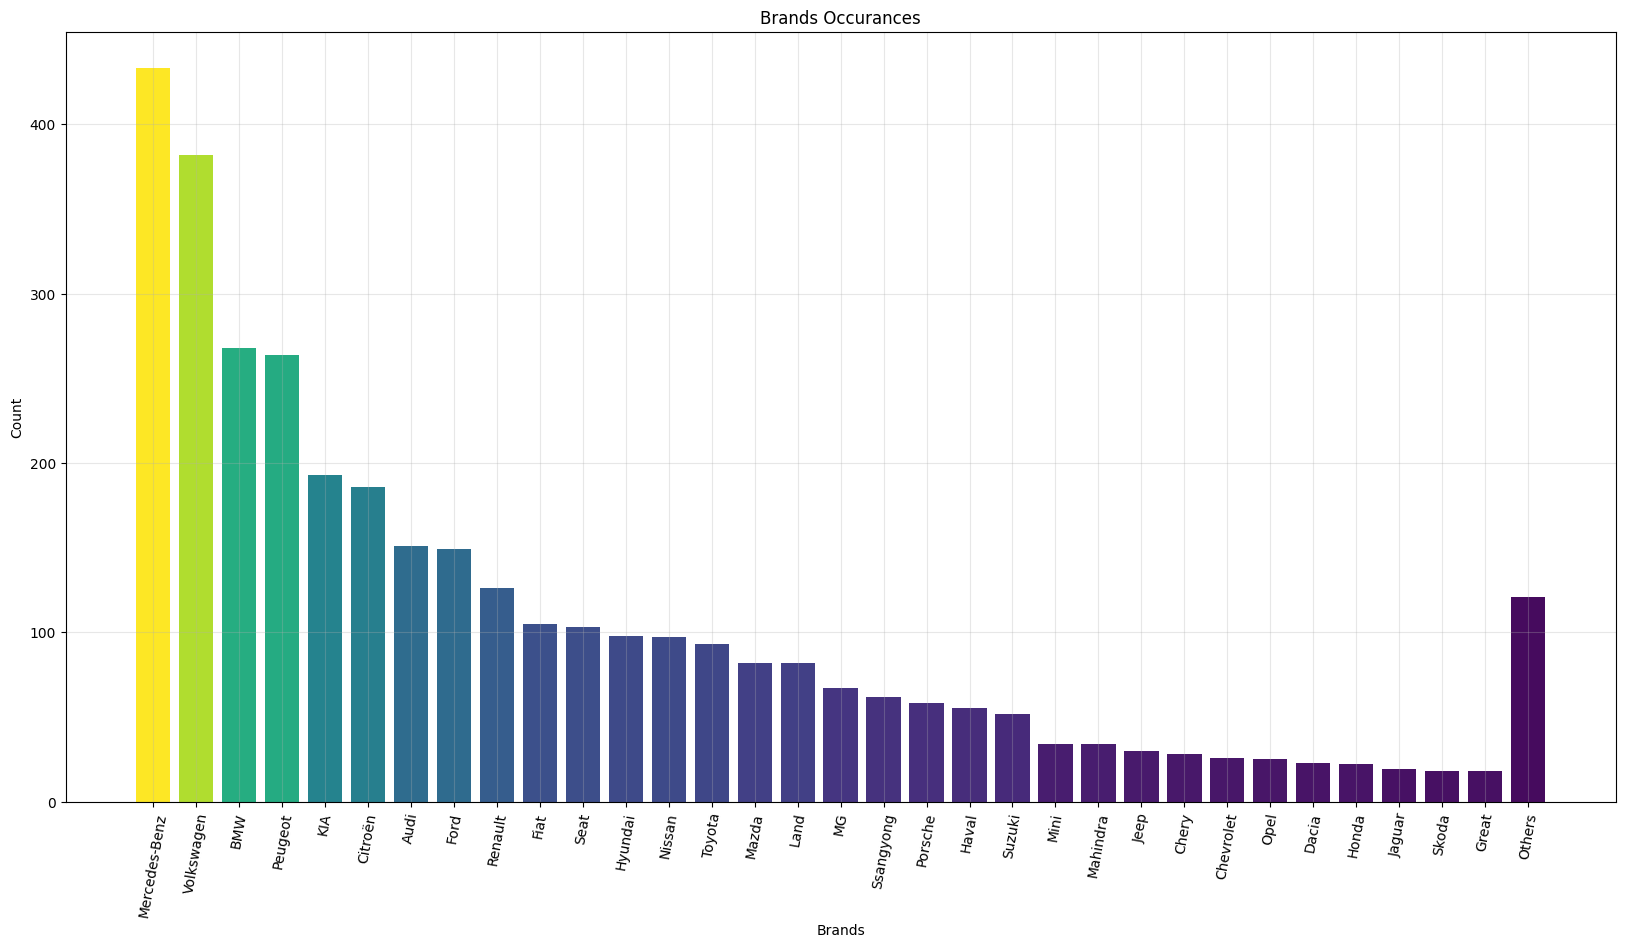

In [40]:
Brands_count = df['Brand'].value_counts()
Brand = df['Brand']

print(Brands_count)
threshold = 0.005 

filtered_Brand_counts = Brands_count[Brands_count / Brands_count.sum() >= threshold]
filtered_Brand_counts['Others'] = Brands_count[Brands_count / Brands_count.sum() < threshold].sum()

colors = cm.viridis(Brands_count.values / max(Brands_count.values))
plt.figure(figsize=(20,10))
plt.bar(filtered_Brand_counts.index, filtered_Brand_counts.values , color=colors)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Brands Occurances')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=80)
plt.show()



Body_type
Berline       902
SUV/4x4       698
Citadine      688
Autres        426
Compacte      372
Coupé         187
Utilitaire    112
Pick up        54
Monospace      45
Cabriolet      20
Name: count, dtype: int64


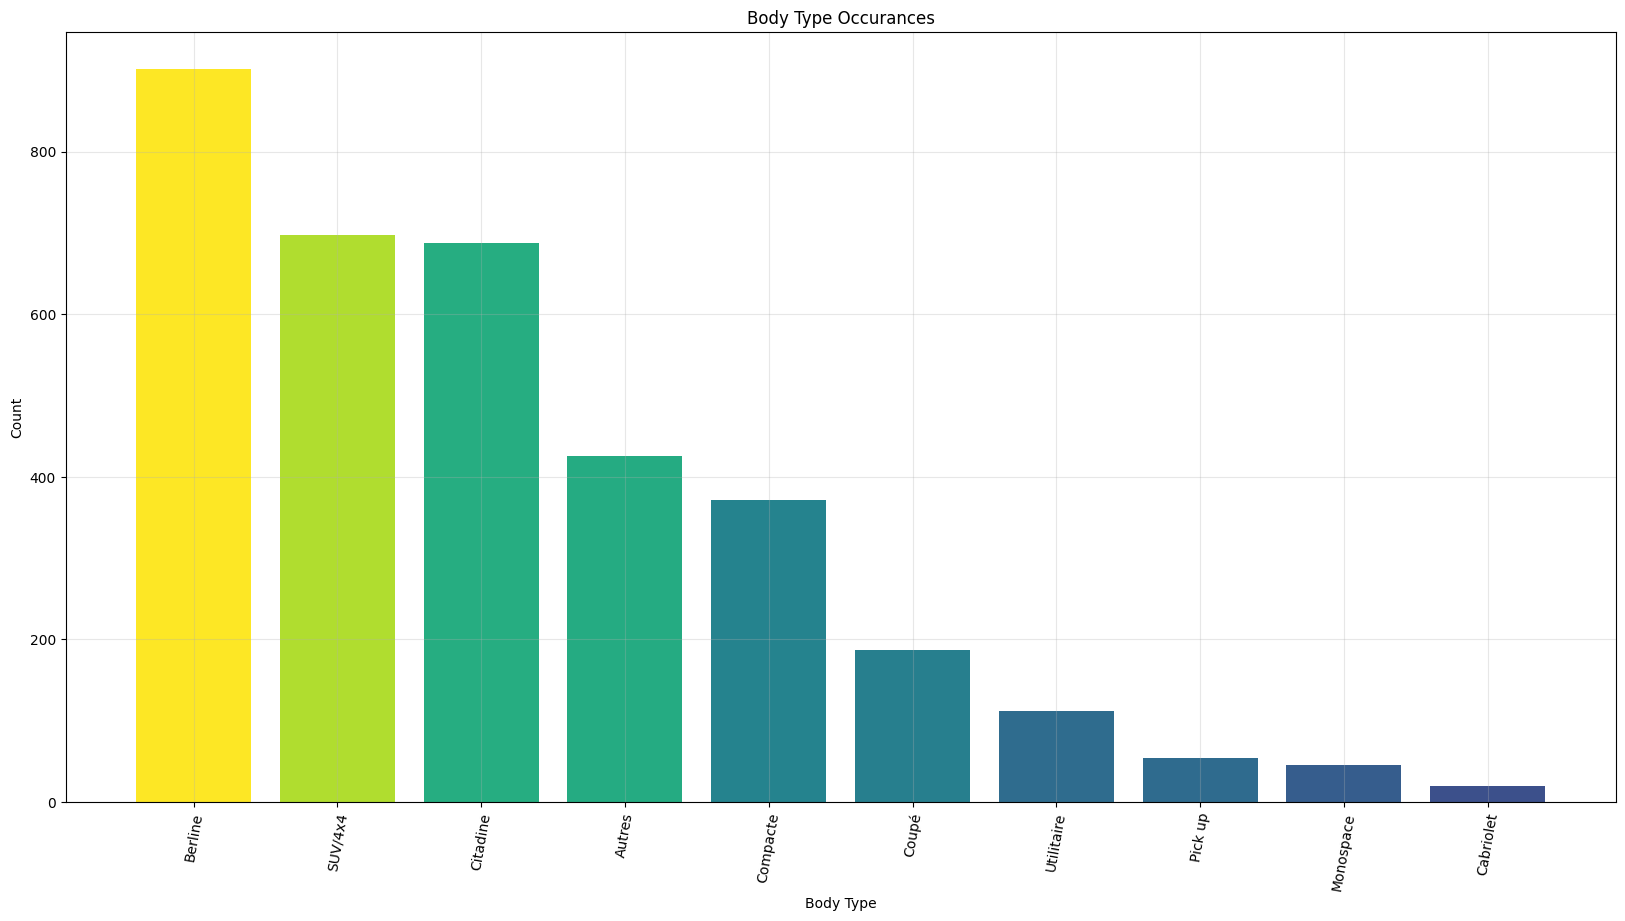

In [41]:
Body_type_count = df['Body_type'].value_counts()
print(Body_type_count)

colors = cm.viridis(Brands_count.values / max(Brands_count.values))
plt.figure(figsize=(20,10))
plt.bar(Body_type_count.index, Body_type_count.values , color=colors)
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Body Type Occurances')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=80)
plt.show()
 


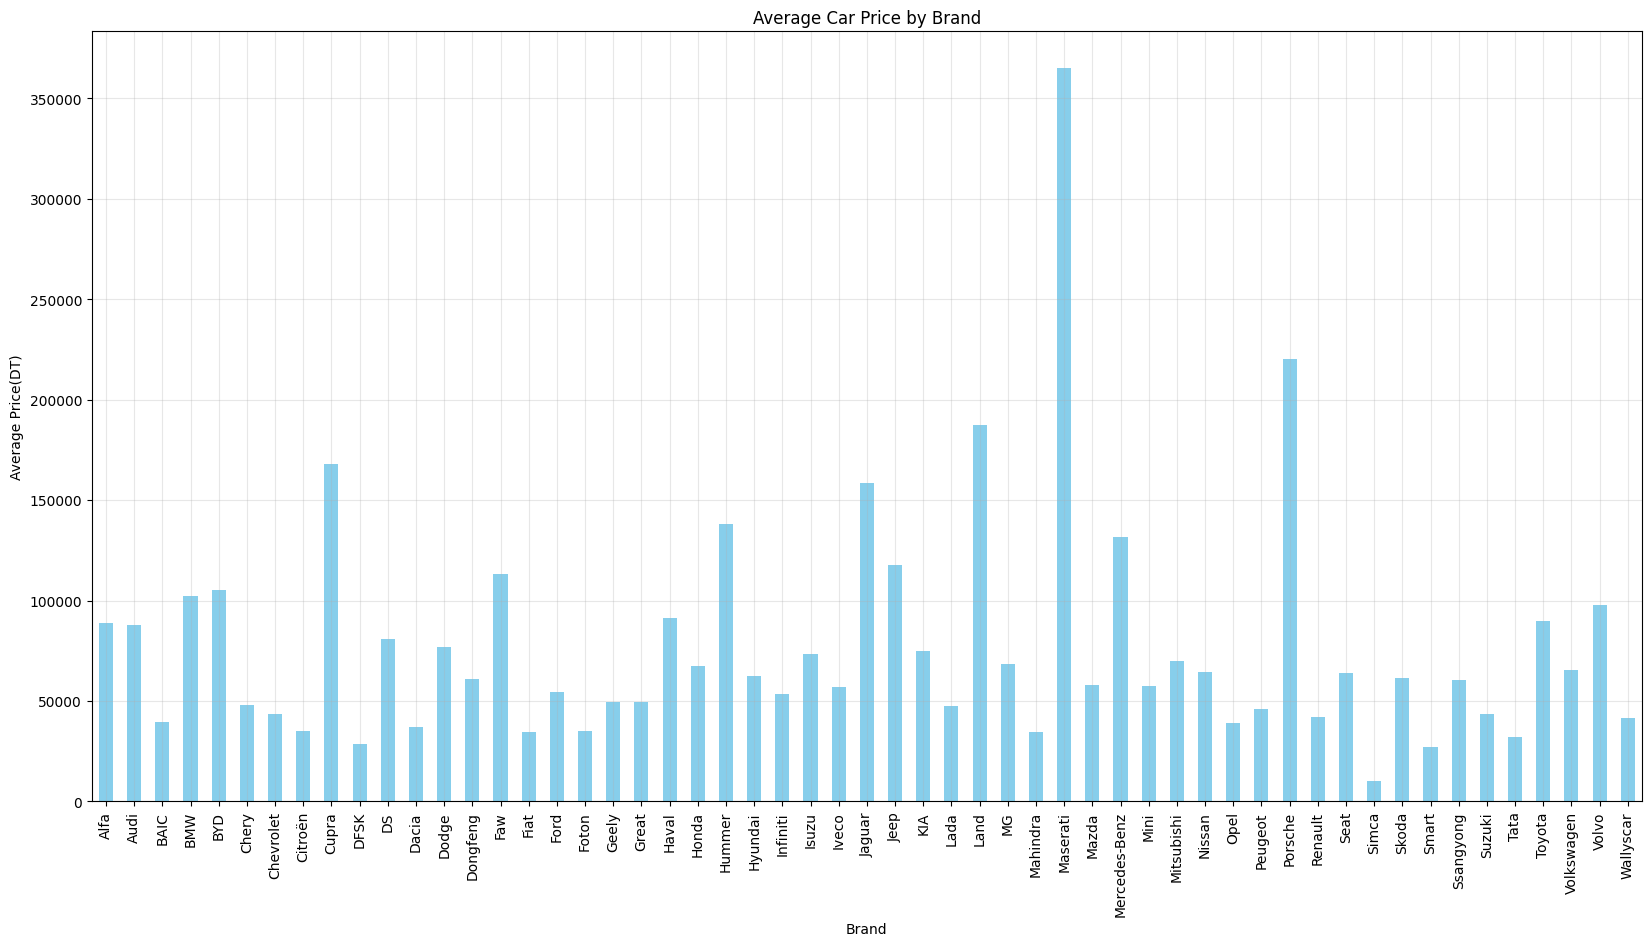

In [42]:
brand_avg_price = df.groupby("Brand")["Price(DT)"].mean()
plt.figure(figsize=(20,10))
brand_avg_price.plot(kind='bar',color='skyblue')
plt.title("Average Car Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price(DT)")
plt.grid(True,alpha=0.3)
plt.show()

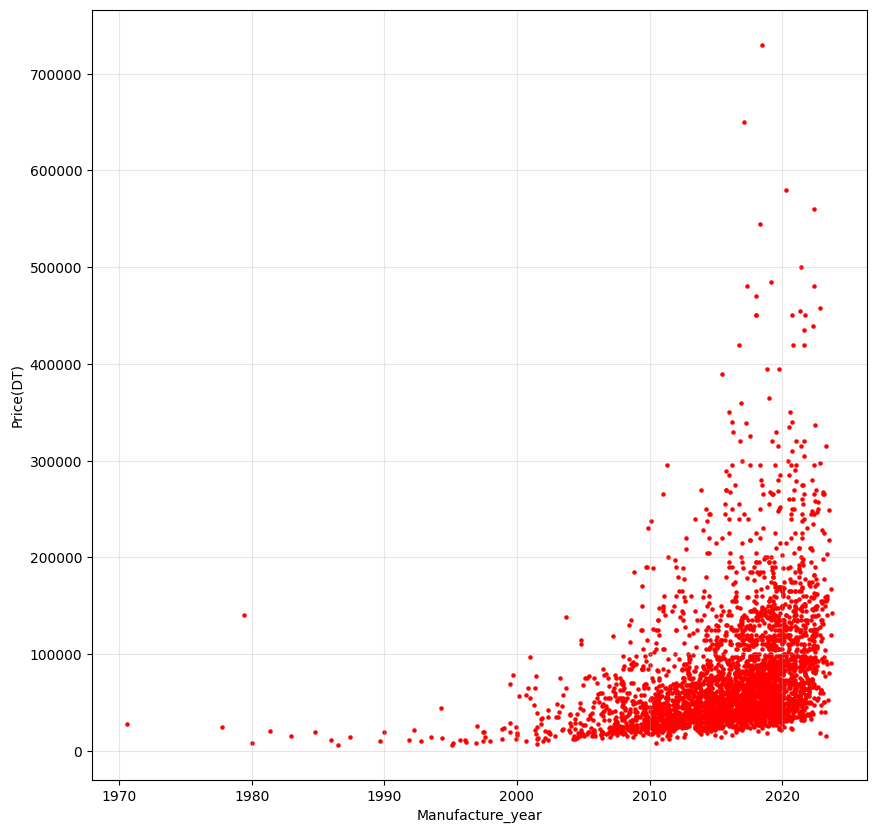

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df['Manufacture_year'],df['Price(DT)'],s=5, c='red')
plt.grid(True,alpha=0.3)
plt.xlabel('Manufacture_year')
plt.ylabel('Price(DT)')
plt.show()

In [71]:
df_Citadine=df[df['Body_type']=='Citadine']
df_Berline=df[df['Body_type']=='Berline']
df_SUV4x4	=df[df['Body_type']=='SUV/4x4']

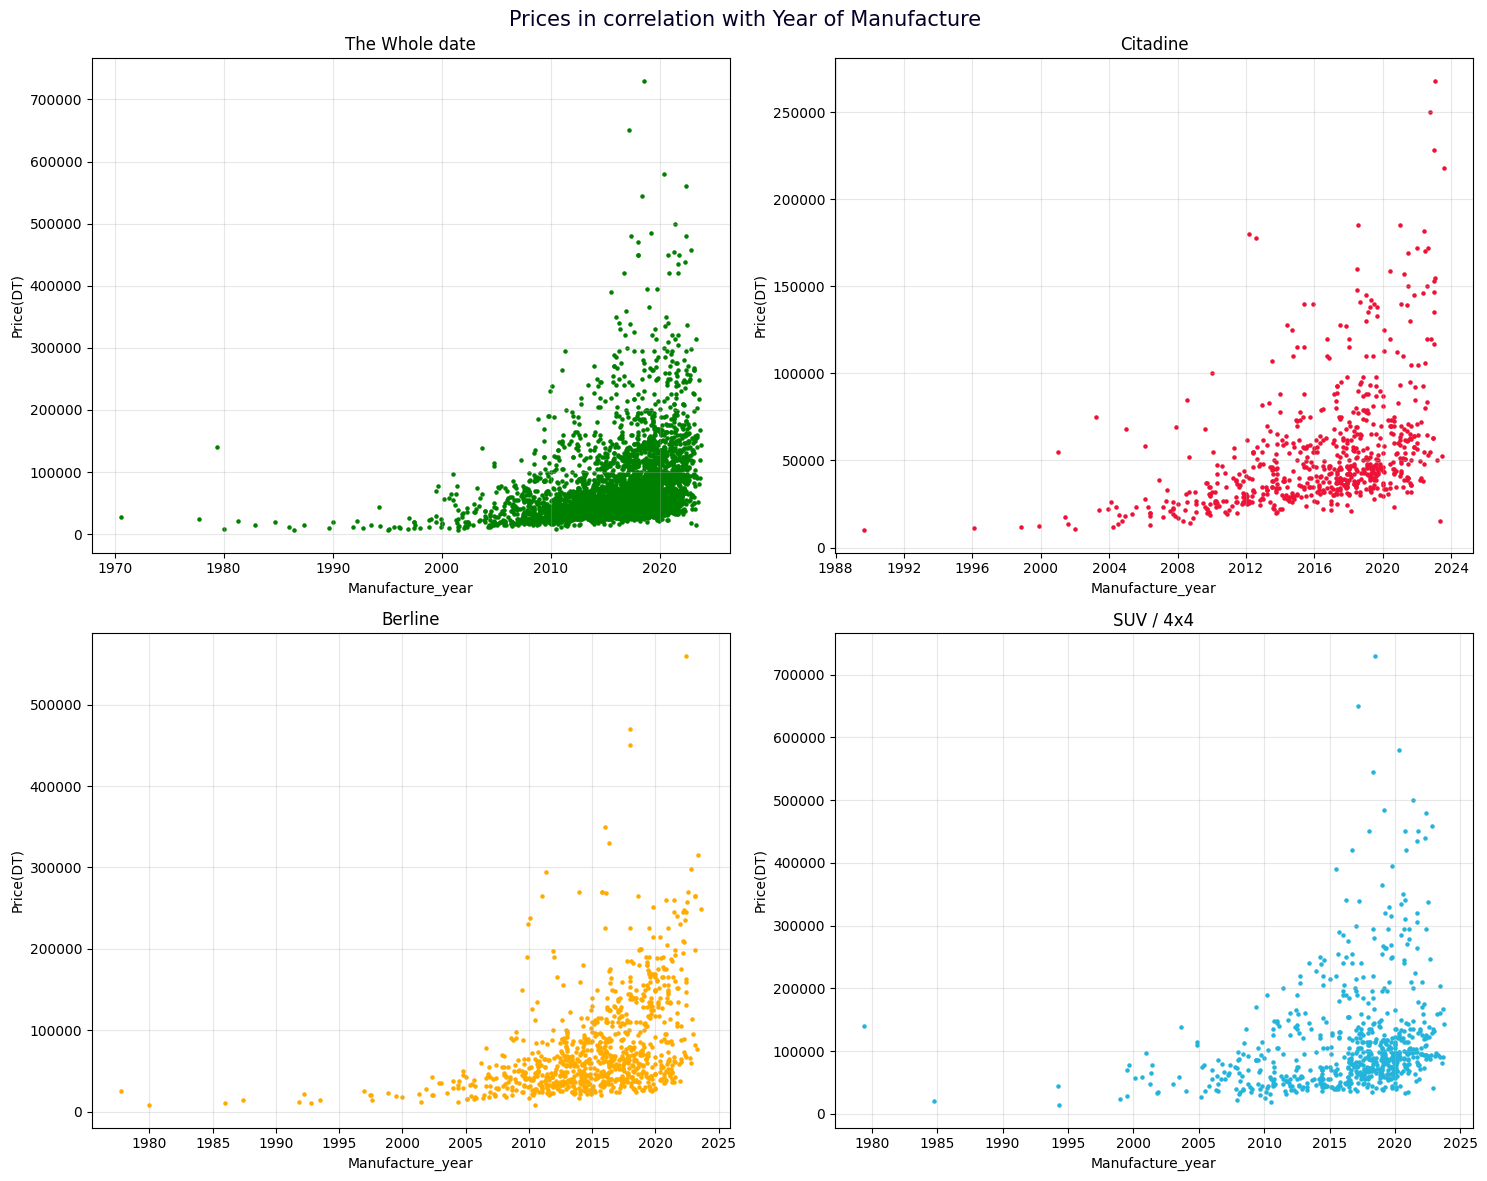

In [96]:
fig, axs = plt.subplots(2,2, figsize=(15, 12))
fig.suptitle('Prices in correlation with Year of Manufacture', fontsize=15, c='#050026')

axs[0,1].scatter(df_Citadine['Manufacture_year'], df_Citadine['Price(DT)'], s=5, c='#ed1236')
axs[0,1].grid(True, alpha=0.3)
axs[0,1].set_xlabel('Manufacture_year')
axs[0,1].set_ylabel('Price(DT)')
axs[0,1].set_title('Citadine')

axs[0,0].scatter(df['Manufacture_year'], df['Price(DT)'], s=5, c='green')
axs[0,0].grid(True, alpha=0.3)
axs[0,0].set_xlabel('Manufacture_year')
axs[0,0].set_ylabel('Price(DT)')
axs[0,0].set_title('The Whole date')

axs[1,0].scatter(df_Berline['Manufacture_year'], df_Berline['Price(DT)'], s=5, c='#ffab00')
axs[1,0].grid(True, alpha=0.3)
axs[1,0].set_xlabel('Manufacture_year')
axs[1,0].set_ylabel('Price(DT)')
axs[1,0].set_title('Berline')

axs[1,1].scatter(df_SUV4x4['Manufacture_year'], df_SUV4x4['Price(DT)'], s=5, c='#24b4db')
axs[1,1].grid(True, alpha=0.3)
axs[1,1].set_xlabel('Manufacture_year')
axs[1,1].set_ylabel('Price(DT)')
axs[1,1].set_title('SUV / 4x4')


plt.tight_layout()
plt.show()




In [43]:
gdf=gpd.read_file('TunisiaMap.shp')

In [44]:
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_AR,ADM1_EN,ADM1_AR,ADM0_EN,ADM0_AR,ADM0_PCODE,geometry
0,1.609485,0.026511,Tunis,????,North East,?????? ??????,Tunisia,????,TN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228..."
1,1.665691,0.042112,Ariana,??????,North East,?????? ??????,Tunisia,????,TN,"POLYGON ((10.21642 37.11139, 10.21638 37.11128..."
2,1.717957,0.066610,Ben Arous,?? ????,North East,?????? ??????,Tunisia,????,TN,"POLYGON ((10.29404 36.81224, 10.29285 36.81081..."
3,2.261815,0.115345,Manouba,?????,North East,?????? ??????,Tunisia,????,TN,"POLYGON ((10.00005 36.91816, 10.00053 36.91749..."
4,3.307740,0.284068,Nabeul,????,North East,?????? ??????,Tunisia,????,TN,"POLYGON ((10.50427 36.30571, 10.50290 36.30583..."
5,3.240378,0.284791,Zaghouan,?????,North East,?????? ??????,Tunisia,????,TN,"POLYGON ((10.04308 36.62286, 10.04317 36.62259..."
6,5.343521,0.366181,Bizerte,?????,North East,?????? ??????,Tunisia,????,TN,"MULTIPOLYGON (((9.74508 37.34723, 9.74509 37.3..."
7,4.386774,0.368195,Béja,????,North West,?????? ??????,Tunisia,????,TN,"POLYGON ((9.56582 36.84114, 9.56893 36.83478, ..."
8,3.647018,0.313341,Jendouba,??????,North West,?????? ??????,Tunisia,????,TN,"POLYGON ((9.01619 36.46341, 9.00545 36.46060, ..."
9,4.181141,0.510845,Le Kef,?????,North West,?????? ??????,Tunisia,????,TN,"POLYGON ((8.93563 36.45224, 8.93532 36.45197, ..."


In [45]:
gdf = gdf.merge(df, left_on='ADM2_EN', right_on='Governorate', how='inner')


In [46]:
ClmnToDrop=['ADM2_AR','ADM1_AR','ADM0_AR','ADM0_PCODE']
gdf.drop(columns=ClmnToDrop,inplace=True)

In [47]:
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM1_EN,ADM0_EN,geometry,Brand,Type,Manufacture_year,Mileage(Km),Price(DT),Body_type,Fuel,Horse_Power,Gear_box,Transmission,Color,Governorate,Address
0,1.609485,0.026511,Tunis,North East,Tunisia,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",Volkswagen,Golf 7,2012-12-01,264500,42000,Compacte,Essence,5 ...,Manuelle,Traction,Blanc,Tunis,AIN ZAGHOUANE
1,1.609485,0.026511,Tunis,North East,Tunisia,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",Mercedes-Benz,Classe A,2021-01-01,50000,165000,Utilitaire,Hybride (essence/électrique),6 ...,Automatique,Traction,Noir,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
2,1.609485,0.026511,Tunis,North East,Tunisia,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",Land,Rover Range Rover Sport HSE TU 239,2014-05-01,90000,238000,SUV/4x4,Essence,24 ...,Automatique,Traction,Vert,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
3,1.609485,0.026511,Tunis,North East,Tunisia,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",Mercedes-Benz,Classe S KIT AMG jantes 20’’,2010-04-01,165000,125500,Berline,Essence,18 ...,Automatique,Traction,Noir,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
4,1.609485,0.026511,Tunis,North East,Tunisia,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",BMW,Série 5 LUXYRY LINE,2018-04-01,46000,183000,Berline,Essence,10 ...,Automatique,Traction,Blanc,Tunis,Show Room HBIB AUTO : Route de la Marsa km 13 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,4.548769,0.740293,Gafsa,South West,Tunisia,"POLYGON ((9.54859 34.26473, 9.54864 34.26378, ...",Fiat,Tipo 5 portes hatchback,2021-06-01,14045,53500,Coupé,Essence,5 ...,Manuelle,Traction,Bleu,Gafsa,Centre télédiffusion gafsa
3473,4.548769,0.740293,Gafsa,South West,Tunisia,"POLYGON ((9.54859 34.26473, 9.54864 34.26378, ...",Volkswagen,Golf 7 Confortline,2013-01-01,135000,48500,Berline,Essence,5 ...,Manuelle,Traction,Noir,Gafsa,gafsa
3474,4.548769,0.740293,Gafsa,South West,Tunisia,"POLYGON ((9.54859 34.26473, 9.54864 34.26378, ...",Peugeot,207 sw HDi,2008-09-01,200000,25000,Compacte,Essence,5 ...,Manuelle,Traction,Beige,Gafsa,Gafsa
3475,3.798989,0.590755,Tozeur,South West,Tunisia,"POLYGON ((8.64039 34.06099, 8.64021 34.06082, ...",Chery,E3 État neuve,2017-10-01,49200,36000,Berline,Essence,6 ...,Manuelle,Traction,Noir,Tozeur,Nefta tozeur


In [48]:
location_data = gdf['Governorate'].value_counts()
Location_counts = pd.DataFrame({'Governorate': location_data.index, 'Count': location_data.values})

gdf = gdf.merge(Location_counts, left_on='Governorate',right_on='Governorate', how='left')

gdf['Count'].fillna(0, inplace=True)  
gdf['Count'] = gdf['Count'].astype(int)  

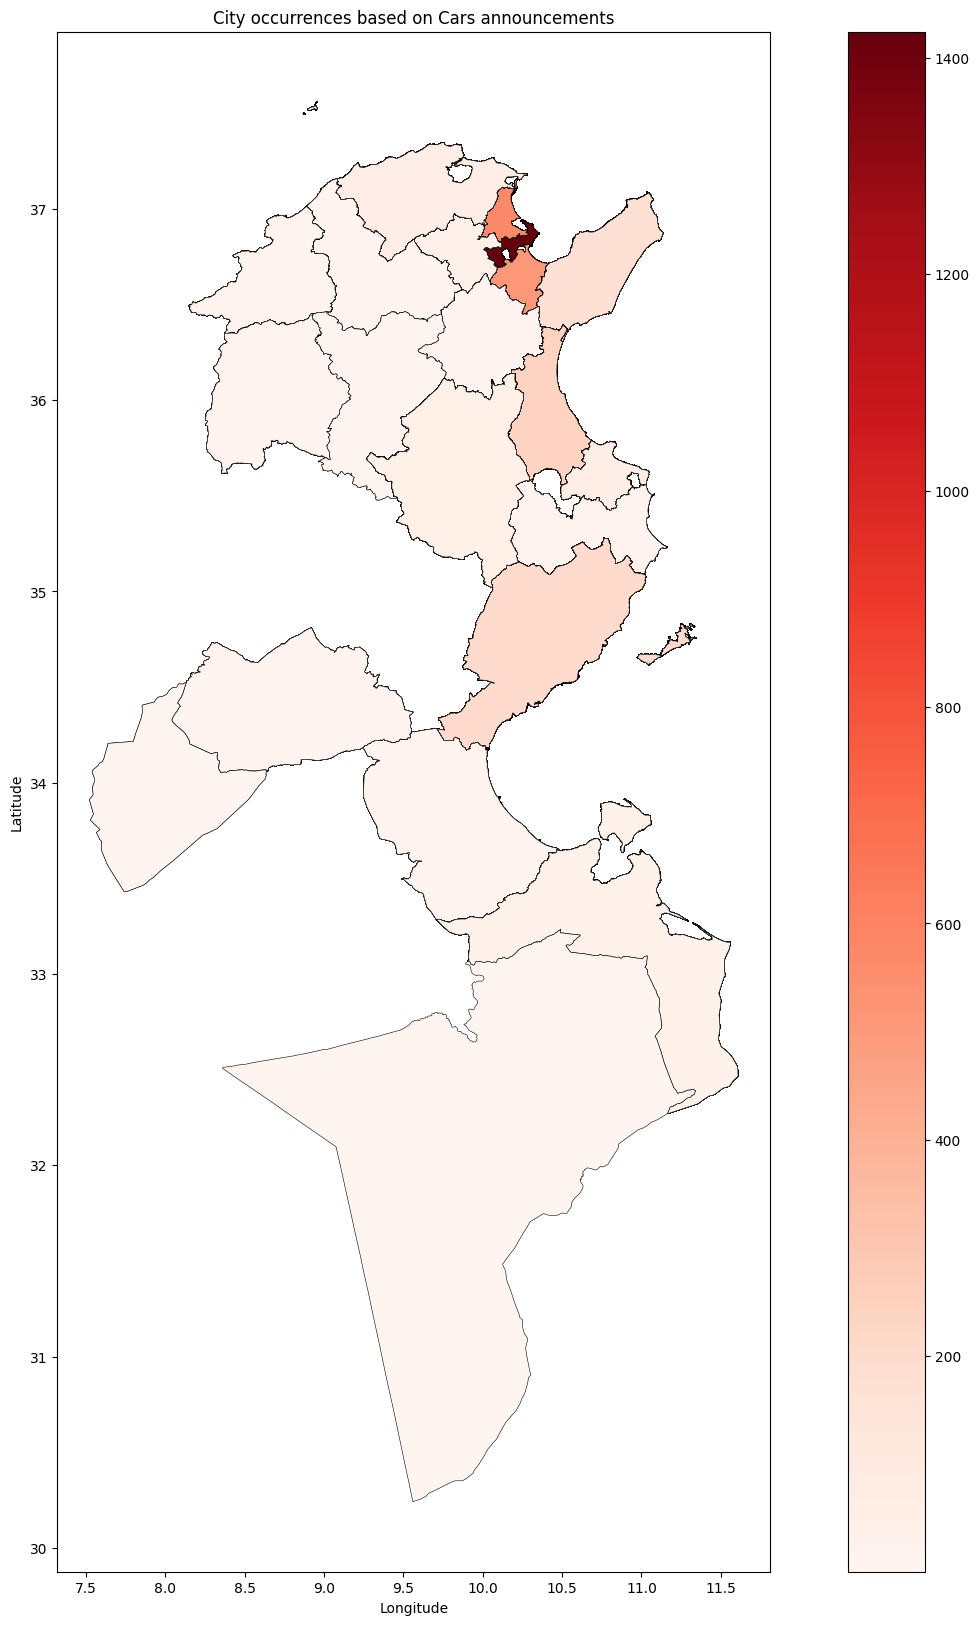

In [49]:
fig, ax = plt.subplots(1, figsize=(20, 20))
gdf.plot(column='Count', cmap='Reds', ax=ax, legend=True, edgecolor='black', linewidth=0.4,missing_kwds={'color': '#e9e8ea'})

ax.set_title('City occurrences based on Cars announcements')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Why Mercedes-Benz has the most annoucements  

In [50]:
Mercedes_Benz=df[df['Brand']=='Mercedes-Benz']

Body_type
Berline       220
Citadine       59
Coupé          38
SUV/4x4        36
Compacte       35
Autres         35
Monospace       6
Utilitaire      2
Pick up         2
Name: count, dtype: int64


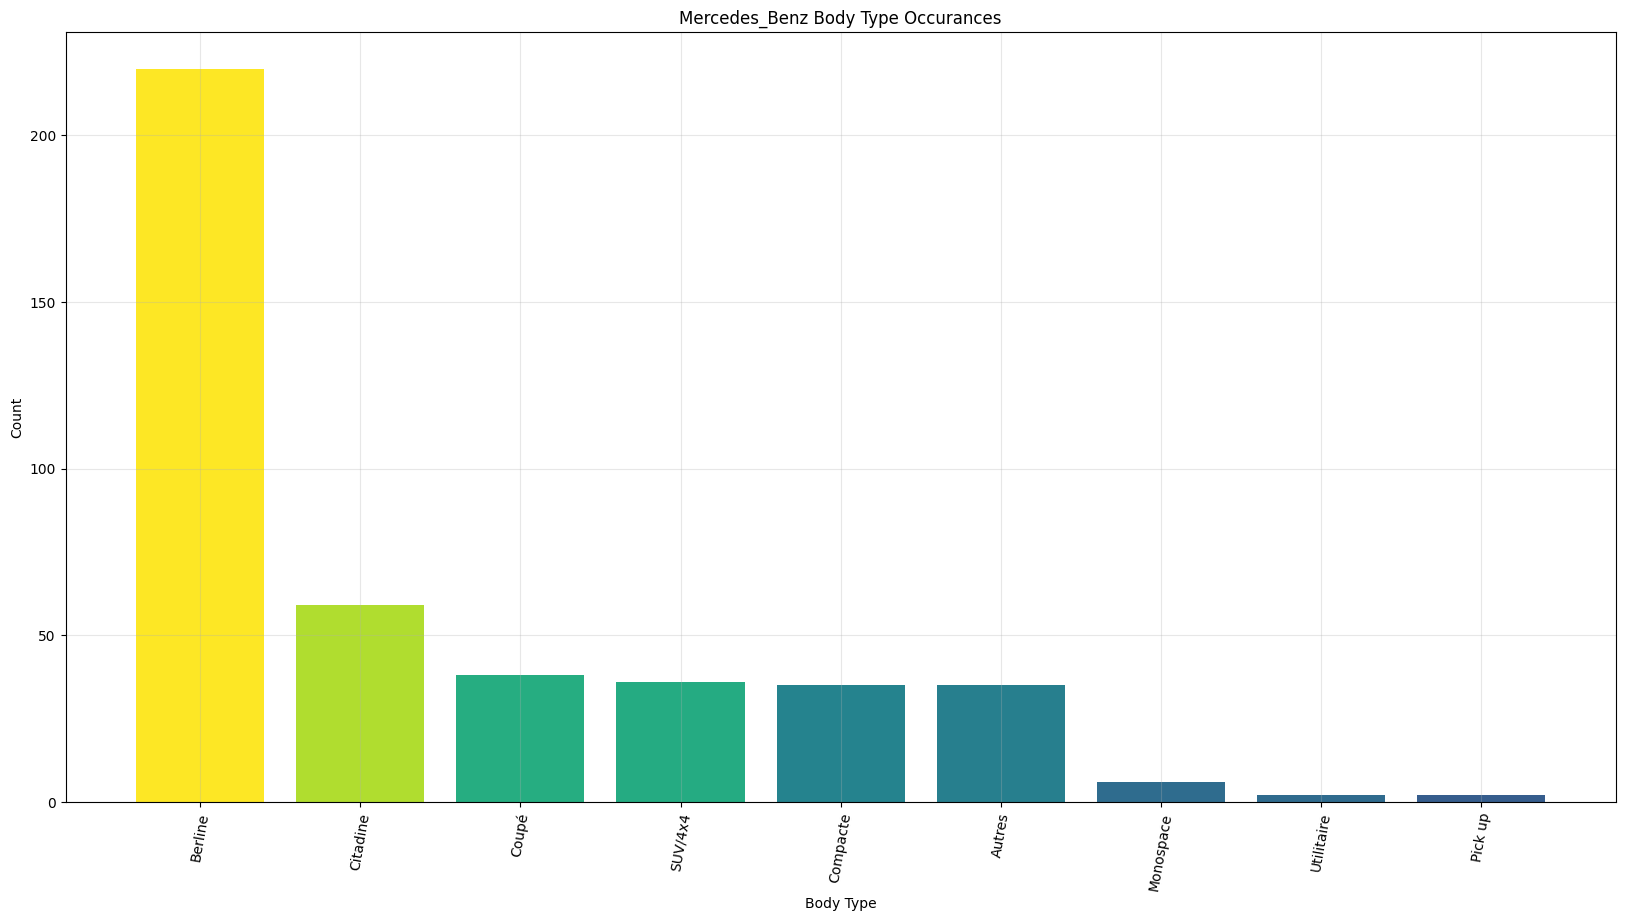

In [51]:
Body_type_count = Mercedes_Benz['Body_type'].value_counts()
print(Body_type_count)

colors = cm.viridis(Brands_count.values / max(Brands_count.values))
plt.figure(figsize=(20,10))
plt.bar(Body_type_count.index, Body_type_count.values , color=colors)
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Mercedes_Benz Body Type Occurances')
plt.grid(True,alpha=0.3)
plt.xticks(rotation=80)
plt.show()

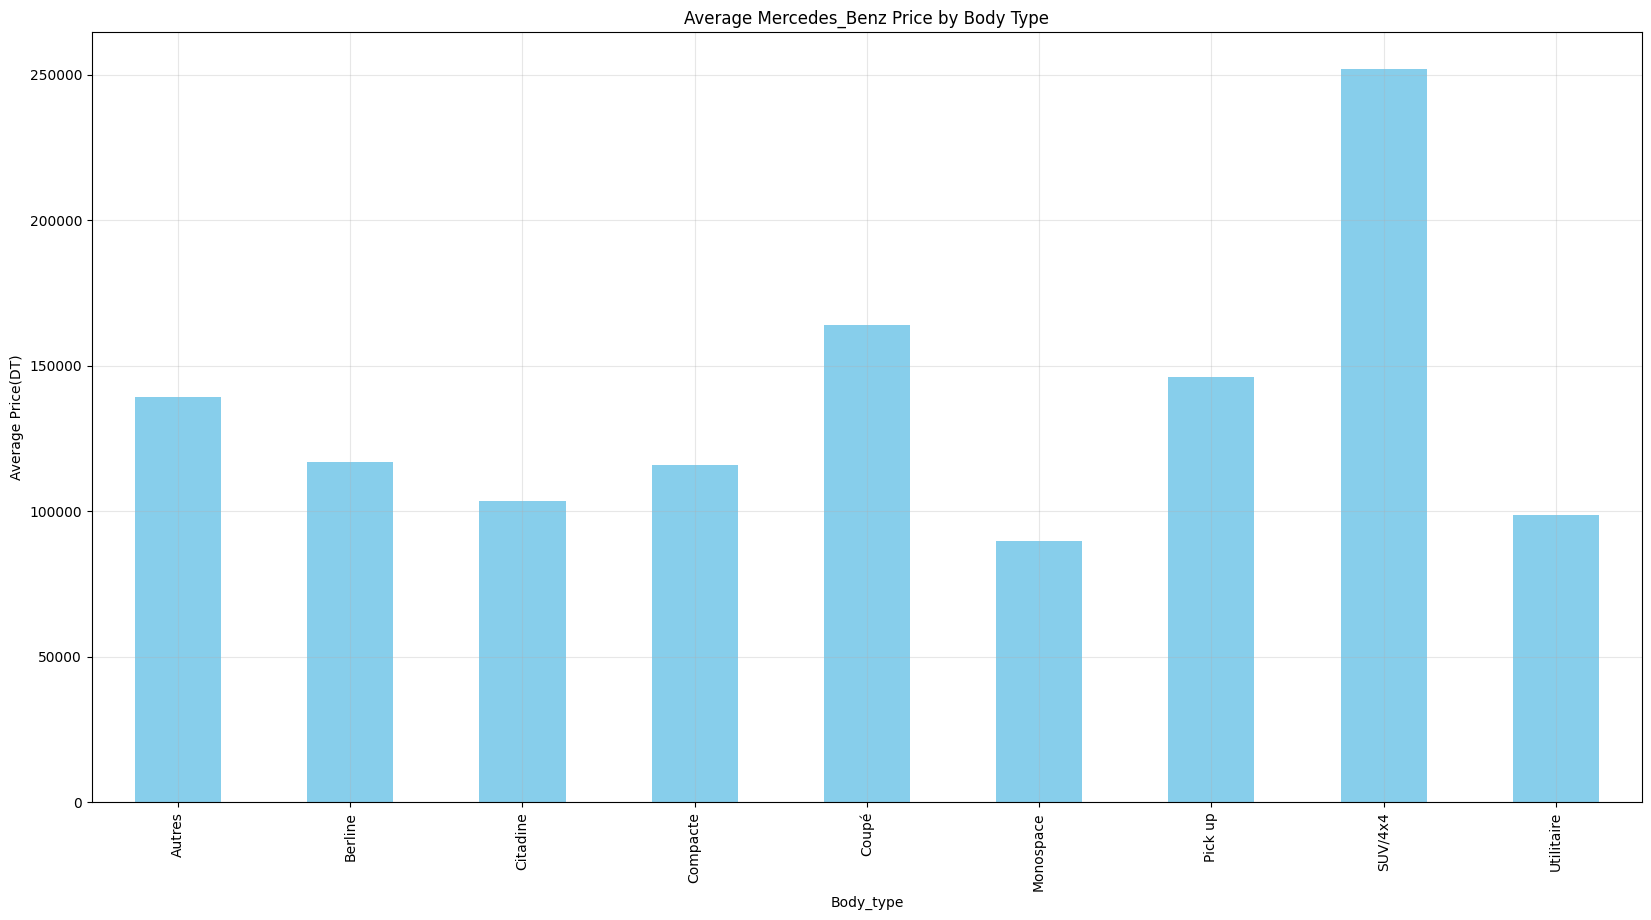

In [52]:
brand_avg_price = Mercedes_Benz.groupby("Body_type")["Price(DT)"].mean()
plt.figure(figsize=(20,10))
brand_avg_price.plot(kind='bar',color='skyblue')
plt.title("Average Mercedes_Benz Price by Body Type")
plt.xlabel("Body_type")
plt.ylabel("Average Price(DT)")
plt.grid(True,alpha=0.3)
plt.show()

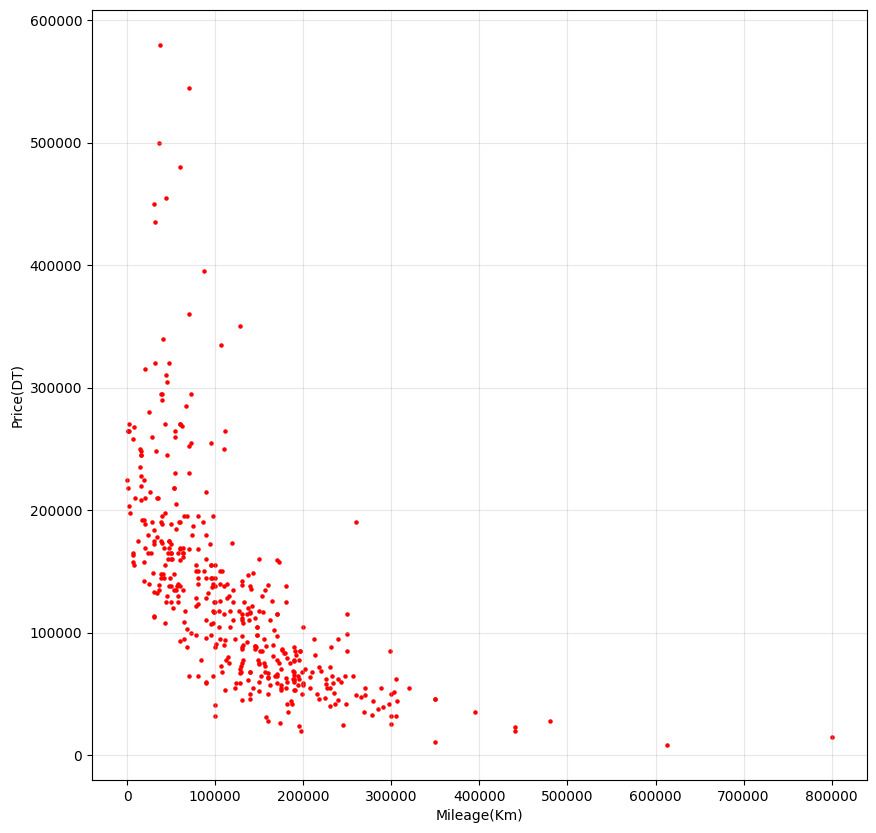

In [53]:

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Mercedes_Benz['Mileage(Km)'],Mercedes_Benz['Price(DT)'],s=5, c='red')
plt.grid(True,alpha=0.3)
plt.xlabel('Mileage(Km)')
plt.ylabel('Price(DT)')
plt.show()

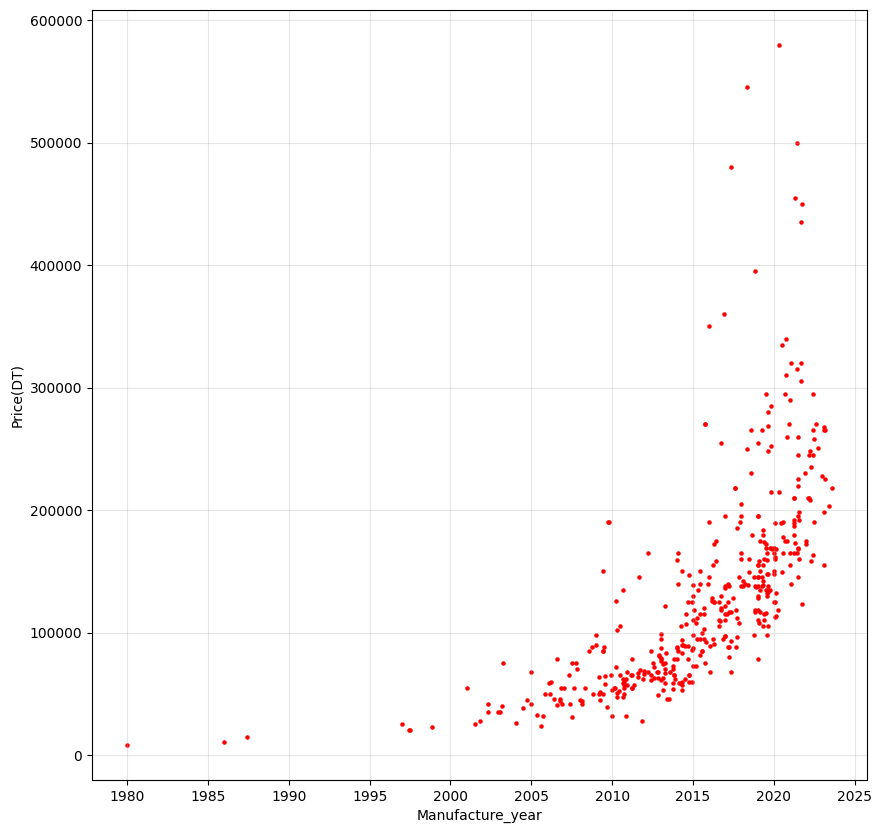

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(Mercedes_Benz['Manufacture_year'],Mercedes_Benz['Price(DT)'],s=5, c='red')
plt.grid(True,alpha=0.3)
plt.xlabel('Manufacture_year')
plt.ylabel('Price(DT)')
plt.show()